In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# 1. Sample generation
classpath = 'lab1dataset/dataanime.csv'
data = pd.read_csv(classpath, delimiter=',')
data.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [3]:
data.shape

(1563, 20)

In [4]:
data.columns

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Studios'>

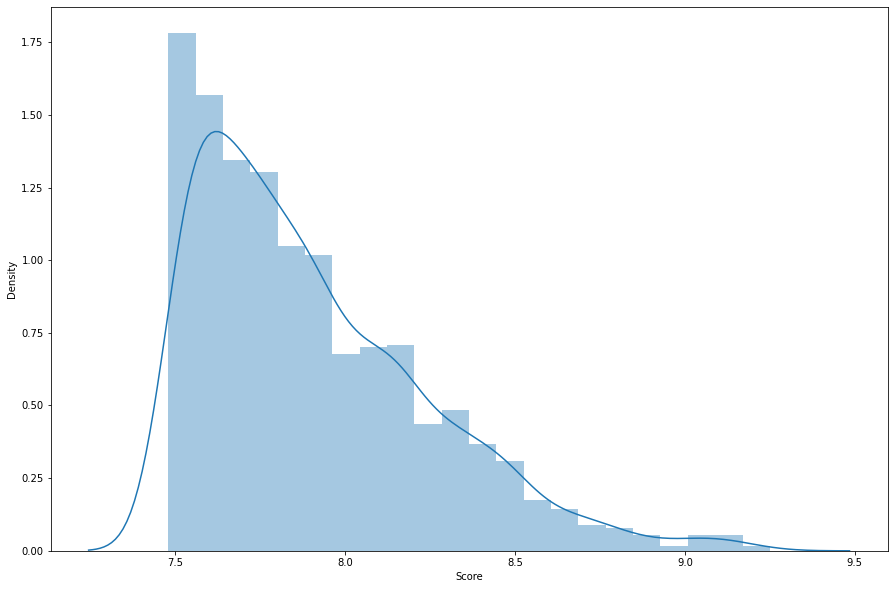

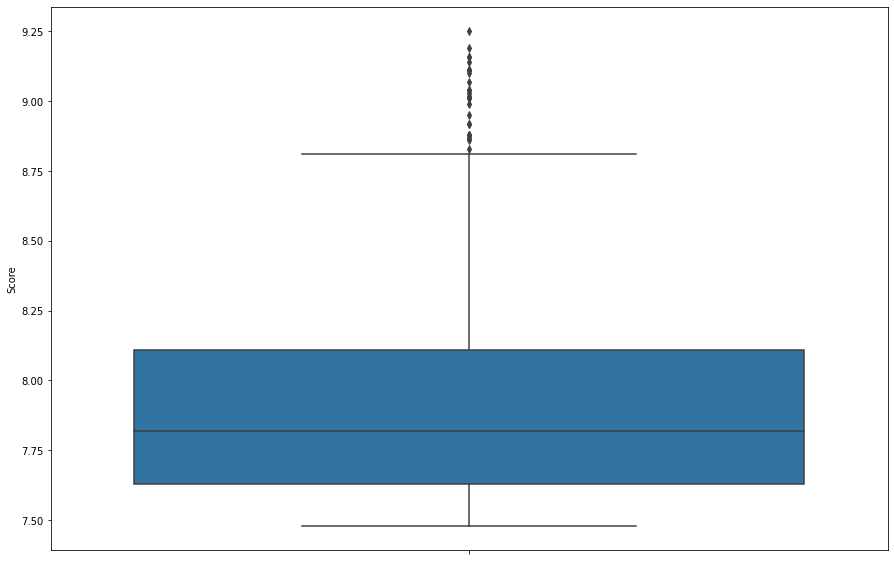

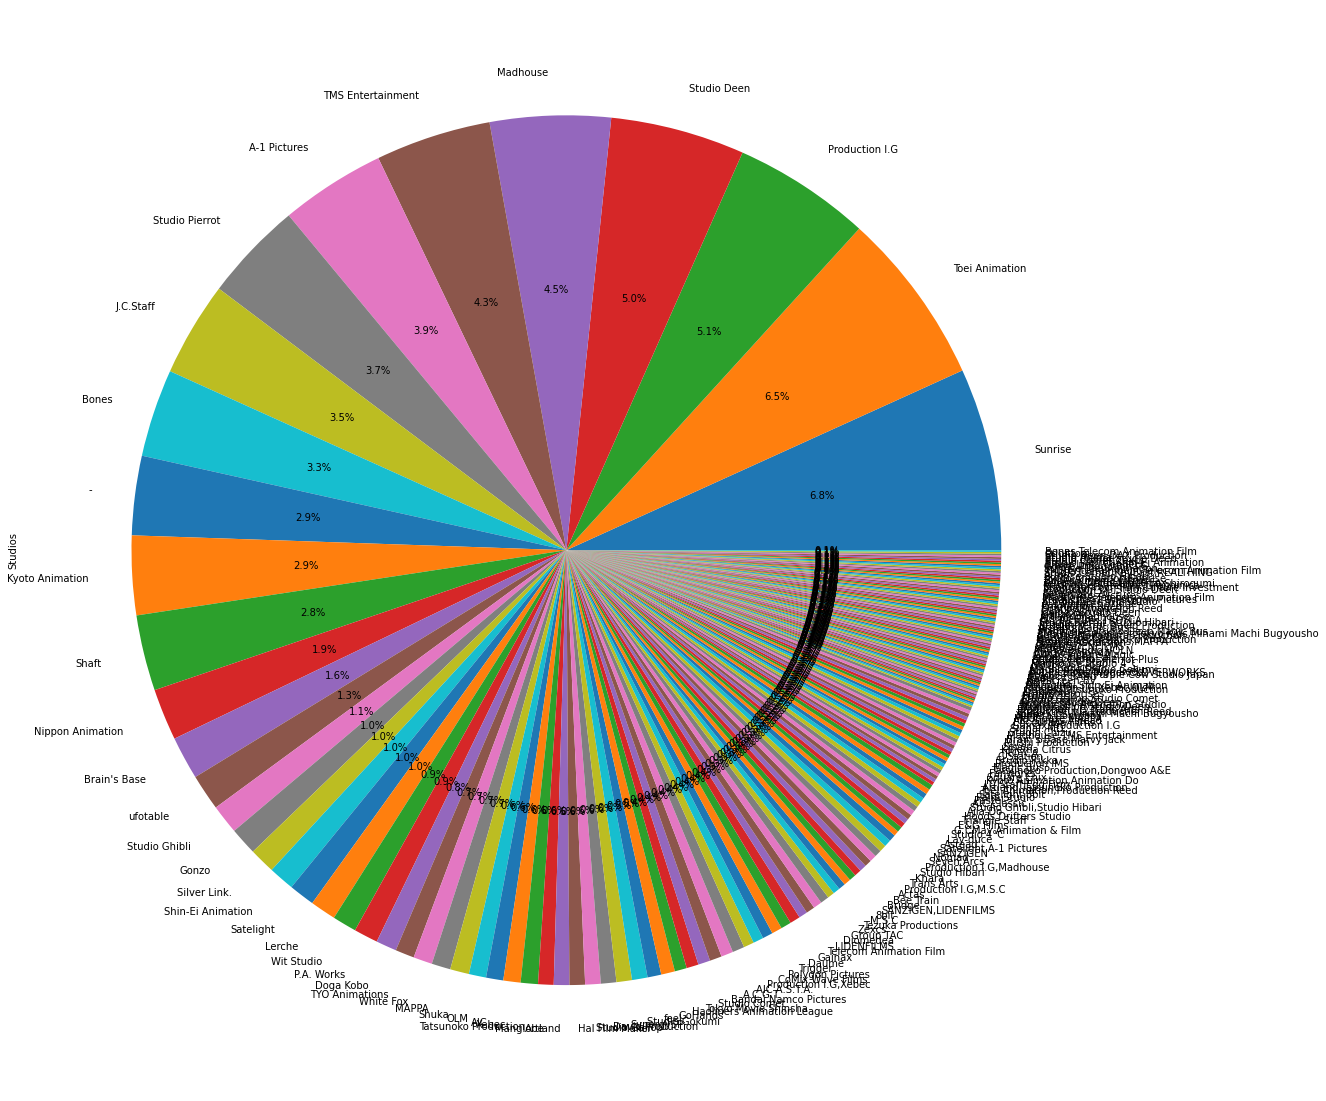

In [6]:
plt.figure(figsize=(15, 10))
sns.distplot(data['Score'])

plt.figure(figsize=(15, 10))
sns.boxplot(y=data['Score'])

plt.figure(figsize=(20, 20))
data['Studios'].value_counts().plot.pie(autopct='%1.1f%%')

In [7]:
#Матожидание
np.nanmean(data['Score'])

7.90514395393474

In [8]:
#Дисперсия
np.nanvar(data['Score'])

0.11561243929006058

In [9]:
#Медиана
np.nanmedian(data['Score'])

7.82

In [10]:
#Средне квадратическое отклонение
np.nanstd(data['Score'])
#Квантили
print(f"25-quantile = {np.quantile(data['Score'], 0.25):.5f}")
print(f"50-quantile = {np.quantile(data['Score'], 0.50):.5f}")
print(f"75-quantile = {np.quantile(data['Score'], 0.75):.5f}")

25-quantile = 7.63000
50-quantile = 7.82000
75-quantile = 8.11000


In [11]:
#Стандартизируйте набор данных по любой оси.
#Центрируйте по среднему значению и по компонентной шкале к единичной дисперсии.
preprocessing.scale(data['Score'])

array([ 3.95524616,  3.77878507,  3.69055452, ..., -1.25035612,
       -1.25035612, -1.25035612])

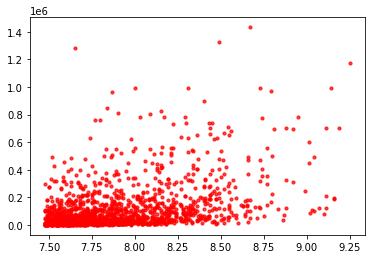

In [12]:
#_, ax = plt.subplots()
#ax.scatter(data['Score'], data['Favorites'], s = 10, color = "r", alpha = 0.75)
#bx = plt.subplots()
#bx.scatter(data['Score'], data['Members'], s = 10, color = "r", alpha = 0.75)
_, ax = plt.subplots()
ax.scatter(data['Score'], data['Members'], s = 10, color = "r", alpha = 0.75)
